In [10]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

# Get dataset
df = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
# Normalize total_bedrooms column
x_array = np.array(df['households'])
normalized_X = preprocessing.normalize([x_array])

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


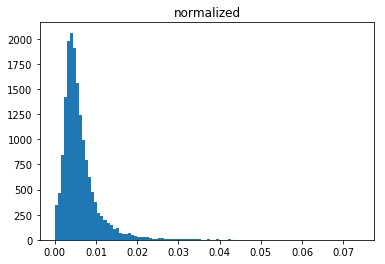

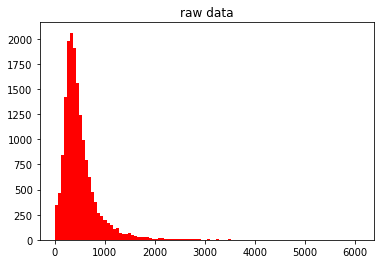

In [32]:
import matplotlib.pylab as plt

plt.hist(x_array.tolist(), bins =100, color='red')
plt.title("raw data")
plt.show()

plt.hist(normalized_X.tolist(), bins =100)
plt.title("normalized")
plt.show()

In [33]:
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

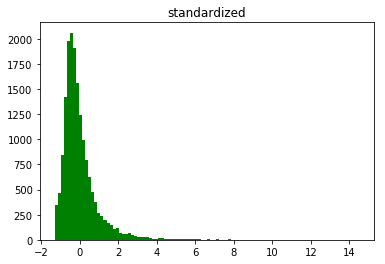

In [36]:
standard_x_array = np.array(scaled_df['households'])

plt.hist(standard_x_array.tolist(), bins = 100, color= 'green')
plt.title("standardized")
plt.show()

In [49]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data", 
                 names=['balance', 'var1', 'var2', 'var3', 'var4'])
 
# Display example observations
df.head()


,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [50]:
from sklearn.utils import resample

df['balance'] = [1 if b=='B' else 0 for b in df.balance]
df['balance'].value_counts()

# Separate majority and minority classes


0    576
1     49
Name: balance, dtype: int64

In [51]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=576,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.balance.value_counts()

1    576
0    576
Name: balance, dtype: int64